In [2]:
import pandas as pd

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

OBS! skriv en markown under uppgifterna istället med info om analysen.

# Initial dataanalysis
### Excercise 1a) an overview of the dataset:

In [4]:
covid19_data = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19.xlsx", "Veckodata Riket")

covid19_data.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [5]:
rows, columns = covid19_data.shape
print(f"The dataframe has got {rows} rows and {columns} columns.")

The dataframe has got 142 rows and 13 columns.


In [6]:
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [7]:
covid19_data.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [8]:
covid19_data.value_counts()

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.000000                      0                  0.000000                      1
2021  50           24485             236                         416                           1260348         12143               66                              8152                       49                   4.700000                      15259              1470.099976                   1
      44           5060              49                          106                           1178586         11355             

### Exercise 1b) Join columns:

In [9]:
"""Year and week in the dataset is concatineted"""

covid19_data["Vecka"] = covid19_data["år"].astype(str) + "v" + covid19_data["veckonummer"].astype(str)

# Sätta ihop de två raderna till en?

covid19_data.drop(columns="veckonummer", inplace=True)
covid19_data.drop(columns="år", inplace=True)

covid19_data

,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,1,0,0,1,0,0,0,0,0.000000,0,0.000000,2020v6
1,0,0,0,1,0,0,0,0,0.000000,0,0.000000,2020v7
2,0,0,0,1,0,0,0,0,0.000000,0,0.000000,2020v8
3,13,0,0,14,0,0,0,0,0.000000,0,0.000000,2020v9
4,211,2,2,225,2,3,3,0,0.000000,0,0.000000,2020v10
5,838,8,10,1063,10,16,19,5,0.500000,5,0.500000,2020v11
6,924,9,17,1987,19,88,107,44,4.300000,49,4.700000,2020v12
7,1957,19,28,3944,38,238,345,190,18.400000,239,23.100000,2020v13
8,3229,31,50,7173,69,277,622,451,43.700001,690,66.800003,2020v14
9,3740,36,67,10913,106,289,911,664,64.300003,1354,131.100006,2020v15


### Exercise 1c) 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Vecka', ylabel='Antal_avlidna_vecka'>

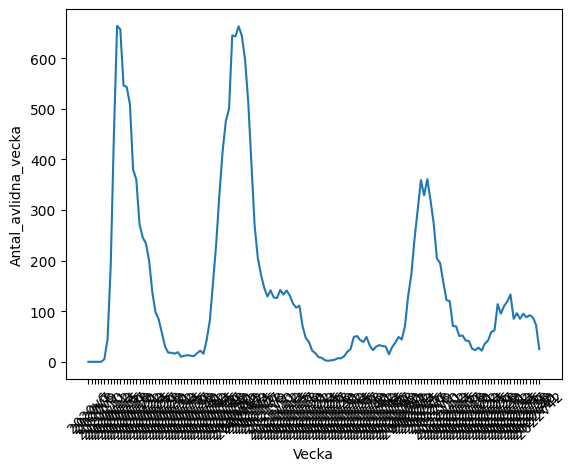

In [26]:
"""Fixa så att tiden går att avläsa på x-axeln"""
plt.xticks(rotation=45)
sns.lineplot(data=covid19_data, x="Vecka", y="Antal_avlidna_vecka")

### Exercise 2a) How many regions are representated in the dataset? 

In [105]:
""""""

covid_data_vaccine = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", "Vaccinerade kommun och ålder")

covid_data_vaccine.head()




,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [98]:
number_of_regions = covid_data_vaccine["Län_namn"].value_counts()
print(f"The number of kommuner is {len(number_of_regions)}")

The number of kommuner is 21


### Exercise 2b)

In [97]:
number_of_kommuner = covid_data_vaccine["Kommun_namn"].value_counts()
number_of_kommuner
print(f"The number of kommuner is {len(number_of_kommuner)}")

The number of kommuner is 290


### Exercise 2c) What is the total population?

In [90]:
import numpy as np

In [96]:
population = covid_data_vaccine["Befolkning"].sum()
print(f"The population is {population}")

The population is 9092790


### Exercise 2d) 

In [134]:
population_in_sweden = 10554692

filtered_rows = covid_data_vaccine.query("Ålder == '12-15' or Ålder == '16-17'")

sum_people_under_18_dataset = filtered_rows["Befolkning"].sum()

under_18_sweden = population_in_sweden - sum_people_under_18_dataset

under_18_sweden

print(f"Based on the dataset there are {under_18_sweden} children under 18 in sweden.")


Based on the dataset there are 9809322 children under 18 in sweden.


### Exercise 2e)

In [136]:
import plotly_express as px

ModuleNotFoundError: No module named 'plotly_express'